# Linear classfier

---------------

In [17]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [18]:
class MyClassfier:
    def __init__(self, input_dim, output_dim):
        self.input_dim = input_dim
        self.output_dim = output_dim
        self.W = tf.Variable(tf.random.uniform(shape=(input_dim, output_dim)))
        self.b = tf.Variable(tf.zeros(shape=(output_dim)))

    def train(self, input_data, targets, epochs=40, print_loss=True):
        for step in range(epochs):
            loss = self._training_step(input_data, targets)
            if print_loss: print(f"Loss at step {step}: {loss:.4f}")
            
    def _training_step(self, input_data, targets):
        with tf.GradientTape() as tape:
            predictions = self.__call__(input_data)
            loss = self._loss_func(predictions, targets)
        gradient_wrt_W, gradient_wrt_b = tape.gradient(loss, [self.W, self.b])
        # 0.1 is Learning rate
        self.W.assign_sub(gradient_wrt_W * 0.1)
        self.b.assign_sub(gradient_wrt_b * 0.1)
        return loss

    def _loss_func(self, predictions, targets):
        per_sample_losses = tf.square(targets - predictions)
        return tf.reduce_mean(per_sample_losses)

    def __call__(self, input):
        return tf.matmul(input, self.W) + self.b

    def draw_linear_line(self, input):
        predictions = self.__call__(input)
        x = np.linspace(-1, 4, 100)
        y = - self.W[0] / self.W[1] * x + (0.5 - self.b) / self.W[1]
        plt.plot(x, y, "-r")
        plt.scatter(samples[:, 0], samples[:, 1], c=predictions[:, 0] > 0.5)

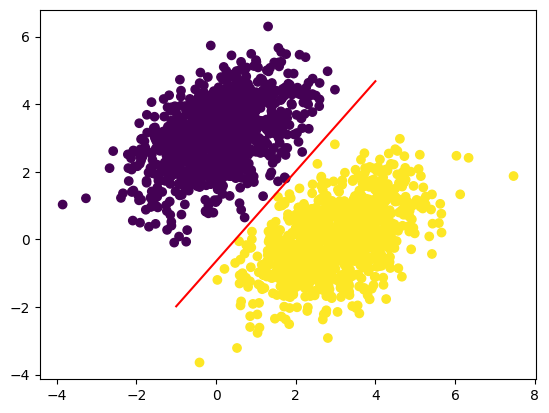

In [19]:
zero_samples = np.random.multivariate_normal(
    mean=[0, 3],
    cov=[[1, 0.5],
         [0.5, 1]],
    size=1000,
)

one_samples = np.random.multivariate_normal(
    mean=[3, 0],
    cov=[[1, 0.5], [0.5, 1]],
    size=1000,
)

samples = np.vstack((zero_samples, one_samples)).astype(np.float32)
targets = np.vstack((np.zeros((1000, 1), dtype="float32"), np.ones((1000, 1), dtype="float32")))

#plt.scatter(samples[:, 0], samples[:, 1], c=targets)

classfier = MyClassfier(2, 1)
classfier.train(samples, targets, epochs=40, print_loss=False)
classfier.draw_linear_line(samples)

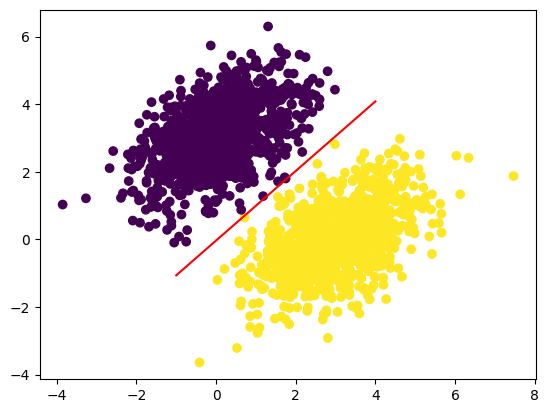

In [21]:
size = 600

zero_samples_2 = np.random.multivariate_normal(
    mean=[0, 3],
    cov=[[1, 0.5],
         [0.5, 1]],
    size=size,
)

one_samples_2 = np.random.multivariate_normal(
    mean=[3, 0],
    cov=[[1, 0.5], [0.5, 1]],
    size=size,
)

samples_2 = np.vstack((zero_samples_2, one_samples_2)).astype(np.float32)
targets_2 = np.vstack((np.zeros((size, 1), dtype="float32"), np.ones((size, 1), dtype="float32")))

classfier_2 = MyClassfier(2, 1)
classfier.train(samples_2, targets_2, epochs=40, print_loss=False)
classfier.draw_linear_line(samples)